In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

In [ ]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [ ]:
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', 
                  header=0, parse_dates=[0], index_col=0, squeeze=True)
series

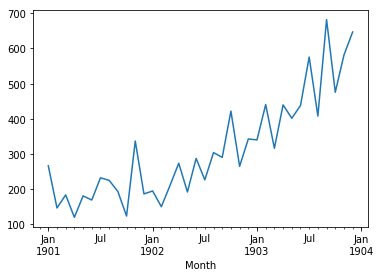

In [5]:
series.plot()
pyplot.show()

In [6]:
from pandas.plotting import autocorrelation_plot

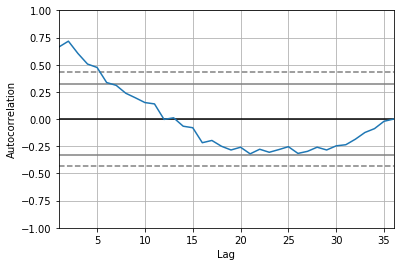

In [7]:
autocorrelation_plot(series)
pyplot.show()

In [8]:
from statsmodels.tsa.arima_model import ARIMA

In [10]:
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [11]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Mon, 25 Nov 2019   AIC                            406.340
Time:                        13:28:27   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     -2.203      0.036      -1.172      -0.068
ar.L3.D.Sales    -0.3606      0.295     -1.222      0.231      -0.939       0.218
ar.L4.D.Sales    -0.1252      0.280     -0.447      0.658      -0.674       0.424
ar.L5.D.Sales     0.1289      0.191      0.673      0.506      -0.246       0.504
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0617           -0.5064j            1.1763           -0.4292
AR.2           -1.0617           +0.5064j            1.1763            0.4292
AR.3            0.0816           -1.3804j            1.3828           -0.2406
AR.4            0.0816           +1.3804j            1.3828            0.2406
AR.5            2.9315           -0.0000j            2.9315           -0.0000
-----------------------------------------------------------------------------
"""

In [14]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)

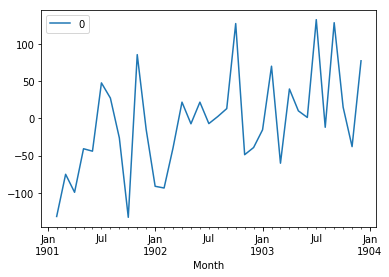

In [15]:
residuals.plot()
pyplot.show()

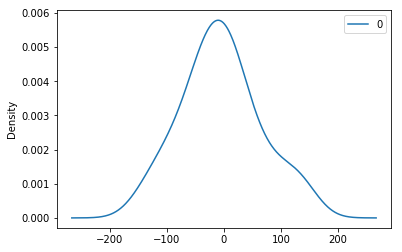

In [16]:
residuals.plot(kind='kde')
pyplot.show()